<a href="https://colab.research.google.com/github/shyampuli/Blood-Group-Detection-Using-Image-Processing-and-Deep-Learning/blob/main/Blood_Group_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os , glob
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd



from sklearn.model_selection import train_test_split    #splits data for training and testing

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.callbacks import  Callback , EarlyStopping
from tensorflow.keras.applications import ResNet50

In [ ]:
!unzip 'Blood_Grp_Detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset_blood_group/A-/cluster_1_3319.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3326.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3329.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3350.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3353.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3356.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3372.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3381.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3394.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3404.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3409.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3414.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3416.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3421.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3423.BMP  
  inflating: dataset_blood_group/A-/cluster_1_3424.BMP  
  inflating: dataset_blood_group/A-/c

In [ ]:
from zipfile import ZipFile
dataset = '/content/Blood_Grp_Detection.zip'

with ZipFile(dataset ,'r') as zip:
  zip.extractall()
  print('extracted')


extracted


In [ ]:
# prompt: put all the images of the subfoldders of : /content/dataset_blood_group  into a single folder and add labels
#### Merge all the images of dataset into sinle file.

import os
import shutil

# Create a new folder to store all the images
destination_folder = '/content/all_images'
os.makedirs(destination_folder, exist_ok=True)

# Iterate over the subfolders in '/content/dataset_blood_group'
for subfolder in os.listdir('/content/dataset_blood_group'):
    subfolder_path = os.path.join('/content/dataset_blood_group', subfolder)

    # Iterate over the images in each subfolder
    for image_file in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_file)

        # Copy the image to the destination folder
        shutil.copy(image_path, os.path.join(destination_folder, image_file))

        # Add the label to the image file name
        new_image_file = subfolder + '_' + image_file
        os.rename(os.path.join(destination_folder, image_file), os.path.join(destination_folder, new_image_file))


In [ ]:
import os

path,dirs,files = next(os.walk('/content/all_images'))

file_count = len(files)
print('No.of Images = ',file_count )

No.of Images =  6000


###Import Libraries

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google. colab.patches import cv2_imshow

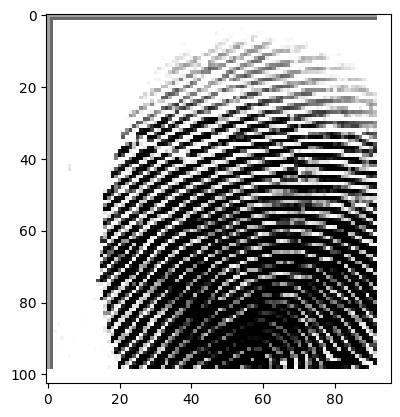

In [ ]:
#Displaying A+ image
img = mpimg. imread('/content/all_images/A+_cluster_0_1001.BMP' )
imgplt = plt.imshow(img)
plt . show( )

In [ ]:
file_names = os.listdir( '/content/all_images' )
for i in range(5):
     name = file_names[i]
     print(name[0:5])

A+_cl
O+_cl
O+_cl
B-_cl
A-_cl


In [ ]:
file_names = os.listdir('/content/all_images')
A_pos_count = 0
A_neg_count = 0
B_pos_count = 0
B_neg_count = 0
AB_pos_count = 0
AB_neg_count = 0
O_pos_count = 0
O_neg_count = 0

for img_file in file_names:
  name = img_file
  if name.startswith('A+'):
    A_pos_count += 1
  elif name.startswith('A-'):
    A_neg_count += 1
  elif name.startswith('B+'):
    B_pos_count += 1
  elif name.startswith('B-'):
    B_neg_count += 1
  elif name.startswith('AB+'):
    AB_pos_count += 1
  elif name.startswith('AB-'):
    AB_neg_count += 1
  elif name.startswith('O+'):
    O_pos_count += 1
  elif name.startswith('O-'):
    O_neg_count += 1

print('A+ count:', A_pos_count)
print('A- count:', A_neg_count)
print('B+ count:', B_pos_count)
print('B- count:', B_ne_count)
print('AB+ count:', AB_pos_count)
print('AB- count:', AB_neg_count)
print('O+ count:', O_pos_count)
print('O- count:', O_neg_count)

A+ count: 565
A- count: 1009
B+ count: 652
B- count: 741
AB+ count: 708
AB- count: 761
O+ count: 852
O- count: 712


####Resizing Images


In [ ]:
os.mkdir('/content/New_Resized_Images')

In [ ]:

original_folder = '/content/all_images'
resized_folder = '/content/New_Resized_Images'
for i in range(6000):
  filename = os.listdir(original_folder)[i]
  img_path = os.path.join(original_folder, filename) # or original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224, 224))

  newImgPath = os.path.join(resized_folder, filename)
  img.save(newImgPath)


In [ ]:
filenames = os.listdir('/content/New_Resized_Images')
print(len(filenames))

0


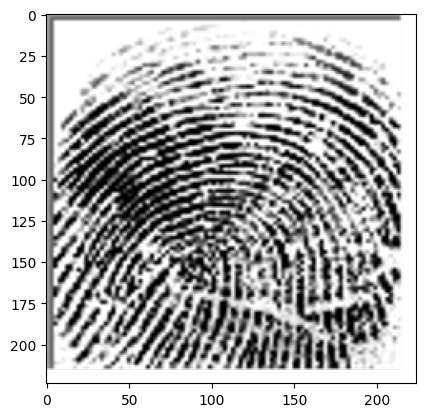

In [ ]:
img_resized = mpimg.imread('/content/all_images/A+_cluster_0_1029.BMP')
imgplt = plt.imshow(img)
plt.show()

## Creating Labels

A+ = 0

A-  = 1

B+  = 2

B- = 3

AB+  = 4

AB- = 5

O+ = 6

O- = 7


In [ ]:
filenames = os.listdir('/content/all_images')
labels = []

for i in range(6000):
  name = filenames[i]

  if name.startswith('A+'):
    labels.append(0)
  elif name.startswith('A-'):
    labels.append(1)
  elif name.startswith('B+'):
    labels.append(2)
  elif name.startswith('B-'):
    labels.append(3)
  elif name.startswith('AB+'):
    labels.append(4)
  elif name.startswith('AB-'):
    labels.append(5)
  elif name.startswith('O+'):
    labels.append(6)
  elif name.startswith('O-'):
    labels.append(7)


In [ ]:
filenames = os.listdir('/content/all_images')
print(len(filenames))

6000


In [ ]:
 print(len(labels))

6000


In [ ]:
print(labels[0:5])  , print(filenames[0:5])

[4, 3, 6, 6, 5]
['AB+_cluster_4_3861.BMP', 'B-_cluster_3_4824.BMP', 'O+_cluster_6_1039.BMP', 'O+_cluster_6_5240.BMP', 'AB-_cluster_5_3082.BMP']


(None, None)

### Converting Images to Numpy Arrays

##Convert .BMP images of resized images  to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:

import numpy as np
from PIL import Image

# Get all the image file paths in the folder
image_paths = [os.path.join('/content/New_Resized_Images', f) for f in os.listdir('/content/New_Resized_Images') if f.endswith('.BMP')]

# Create an empty list to store the numpy arrays
image_arrays = []

# Iterate over the image paths and convert each image to a numpy array
for image_path in image_paths:
    image = Image.open(image_path)
    image_array = np.array(image)
    image_arrays.append(image_array)


new_array =  np.array(image_arrays)
print(new_array.shape)

(6000, 224, 224, 3)


In [ ]:
type(new_array)

numpy.ndarray

In [ ]:
X=new_array
Y=np.asarray(labels)

## Train Test Split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.4 , random_state = 2)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=1500, test_size=600, random_state=3)

print(X.shape , X_train.shape , X_test.shape)

(6000, 224, 224, 3) (3600, 224, 224, 3) (2400, 224, 224, 3)


4800 --> Train Images

1200 --> Test Images


In [ ]:
# scaling the data
#X_train_scaled = X_train[0:1500] / 255
#X_test_scaled = X_test[0:1200]/255

#X_train_scaled = X_train / 255
#X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled[2])

[[[0.62745098 0.62745098 0.62745098]
  [0.62745098 0.62745098 0.62745098]
  [0.63921569 0.63921569 0.63921569]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.63137255 0.63137255 0.63137255]
  [0.62352941 0.62352941 0.62352941]
  [0.61176471 0.61176471 0.61176471]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.63921569 0.63921569 0.63921569]
  [0.61568627 0.61568627 0.61568627]
  [0.54901961 0.54901961 0.54901961]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


## Building the Neural Network


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# Mobilenet model

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:

resnet50_model = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
pretrained_model = hub.KerasLayer(resnet50_model, input_shape=(224,224,3), trainable=False)


In [ ]:
# Define the URL for the Xception model
xception_model = 'https://tfhub.dev/google/imagenet/xception/feature_vector/4'

# Load the pre-trained Xception model from TensorFlow Hub
pretrained_model = hub.KerasLayer(xception_model, input_shape=(224,224,3), trainable=False)

OSError: https://tfhub.dev/google/imagenet/xception/feature_vector/4 does not appear to be a valid module.

In [ ]:
#Inception V3

inception_model = 'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'

# Load the pre-trained InceptionV3 model from TensorFlow Hub
pretrained_model = hub.KerasLayer(inception_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes =  8   # 8 different Blood Groups

''''model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])'''

model = tf.keras.Sequential([
    pretrained_model,

    tf.keras.layers.Dense(1024, activation='relu'),  # Add a new Dense layer with ReLU activation
    tf.keras.layers.Dropout(0.5),  # Add Dropout for regularization
    tf.keras.layers.Dense(num_of_classes)  # Output layer with softmax activation for classification
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 25671176 (97.93 MB)
Trainable params: 2106376 (8.04 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)




In [ ]:
model.fit(X_train, Y_train, epochs=5)


''' from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', patience=3)  # Stop if validation accuracy doesn't improve for 3 epochs

model.fit(X_train_scaled, Y_train, epochs=30,validation_data=(X, Y), callbacks=[early_stopping]) # Increase epochs with early stopping'''


Epoch 1/5
113/113 [==============================] - 707s 6s/step - loss: 141.4366 - acc: 0.2603
Epoch 2/5
113/113 [==============================] - 703s 6s/step - loss: 2.3410 - acc: 0.1858
Epoch 3/5
113/113 [==============================] - 703s 6s/step - loss: 2.0406 - acc: 0.1903
Epoch 4/5
113/113 [==============================] - 707s 6s/step - loss: 2.0448 - acc: 0.1783
Epoch 5/5
113/113 [==============================] - 701s 6s/step - loss: 2.0414 - acc: 0.1806


" from tensorflow.keras.callbacks import EarlyStopping\n\nearly_stopping = EarlyStopping(monitor='val_acc', patience=3)  # Stop if validation accuracy doesn't improve for 3 epochs\n\nmodel.fit(X_train_scaled, Y_train, epochs=30,validation_data=(X, Y), callbacks=[early_stopping]) # Increase epochs with early stopping"

In [ ]:
import gc

# Free up RAM by explicitly calling the garbage collector.
gc.collect()

3331

In [ ]:
score , acc = model.evaluate(X_test , Y_test)
print('Test Loss = ' , score)
print('Test accuaracy ' , acc)

NameError: name 'X_test' is not defined

In [ ]:
from tensorflow.keras.models import save_model

# Assuming your model is named 'model'
save_model(model, "75%.h5")


<ipython-input-14-579bc9d0a1c9>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "75%.h5")


In [ ]:
from google.colab import files

# Replace 'your_new_model_name.h5' with the actual filename
files.download('75%.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Loading the Model

In [ ]:
model = tf.keras.models.load_model("/content/your_model_name.h5", custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
from google.colab import files

# Download the file
files.download("your_model_name.h5")


FileNotFoundError: Cannot find file: your_model_name.h5

**Predictive System**

Path of the image to be predicted: /content/cluster_4_4867.BMP


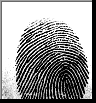

1/1 [==============================] - 0s 83ms/step
[[ -4.171454   -1.6463071  -0.9751261 -10.853521    5.6717715  -5.9278197
   -1.6377611   4.149524 ]]
4
AB+ Blood Group


In [ ]:
import cv2
import glob
input_image_path = input('Path of the image to be predicted: ')

from google.colab.patches import cv2_imshow

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3]) #1 - making prediction for 1 image

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction) #to get closest label

print(input_pred_label)

if input_pred_label == 0:
  print('A+ Blood Group')

elif input_pred_label == 1:
  print('A- Blood Group')
elif input_pred_label == 2:
  print('B+ Blood Group')
elif input_pred_label == 3:
  print('B- Blood Group')
elif input_pred_label == 4:
  print('AB+ Blood Group')
elif input_pred_label == 5:
  print('AB- Blood Group')
elif input_pred_label == 6:
  print('O+ Blood Group')
elif input_pred_label == 7:
  print('O- Blood Group')




In [ ]:
!pip install streamlit==1.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 7.2.0
    Uninstalling importlib_metadata-7.2.0:
      Successfully uninstalled importlib_metadata-7

In [ ]:
 !streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.227.151.22:8501

  Stopping...
  Stopping...
